# READ CSV

In [1]:
import pandas as pd
csv = pd.read_csv('./covid2.csv')


# clear data

In [2]:
twitter_interaction = csv.drop(columns=["_index","_type","_id","_score","_source.id","_source.source"])
twitter_interaction = twitter_interaction.rename(columns={"_source.twittos_a":"twittos_a","_source.interaction":"interaction","_source.twittos_b":"twittos_b"}) 
twitter_interaction

twittos_a interaction           twittos_b
0     973623817926074368    converse           484789980
1              850931100    converse          3064520176
2              850931100    converse  979476209632530433
3              850931100    converse          3153861756
4              385877448    converse  821999852708102144
..                   ...         ...                 ...
743   717796993267990529    converse            19783607
744   717796993267990529    converse            37844553
745   717796993267990529    converse            40313157
746  1106486506842148864    converse            65268724
747   789484466377031680    converse           224495471

[748 rows x 3 columns]

# init matplot

In [6]:
import networkx as nx
import matplotlib.pyplot as plt
g = nx.Graph()
edge_follow = []
edge_converse = []
edge_retweet = []
for id,rows in twitter_interaction.iterrows():
    g.add_edge(rows["twittos_a"],rows["twittos_b"], label=rows["interaction"])
#     if rows["interaction"] == 'follow':
#         edge_follow.append((rows["twittos_a"],rows["twittos_b"]))
    if rows["interaction"] == 'converse':
        edge_converse.append((rows["twittos_a"],rows["twittos_b"]))
    else:
        edge_retweet.append((rows["twittos_a"],rows["twittos_b"]))
pos = nx.spring_layout(g)



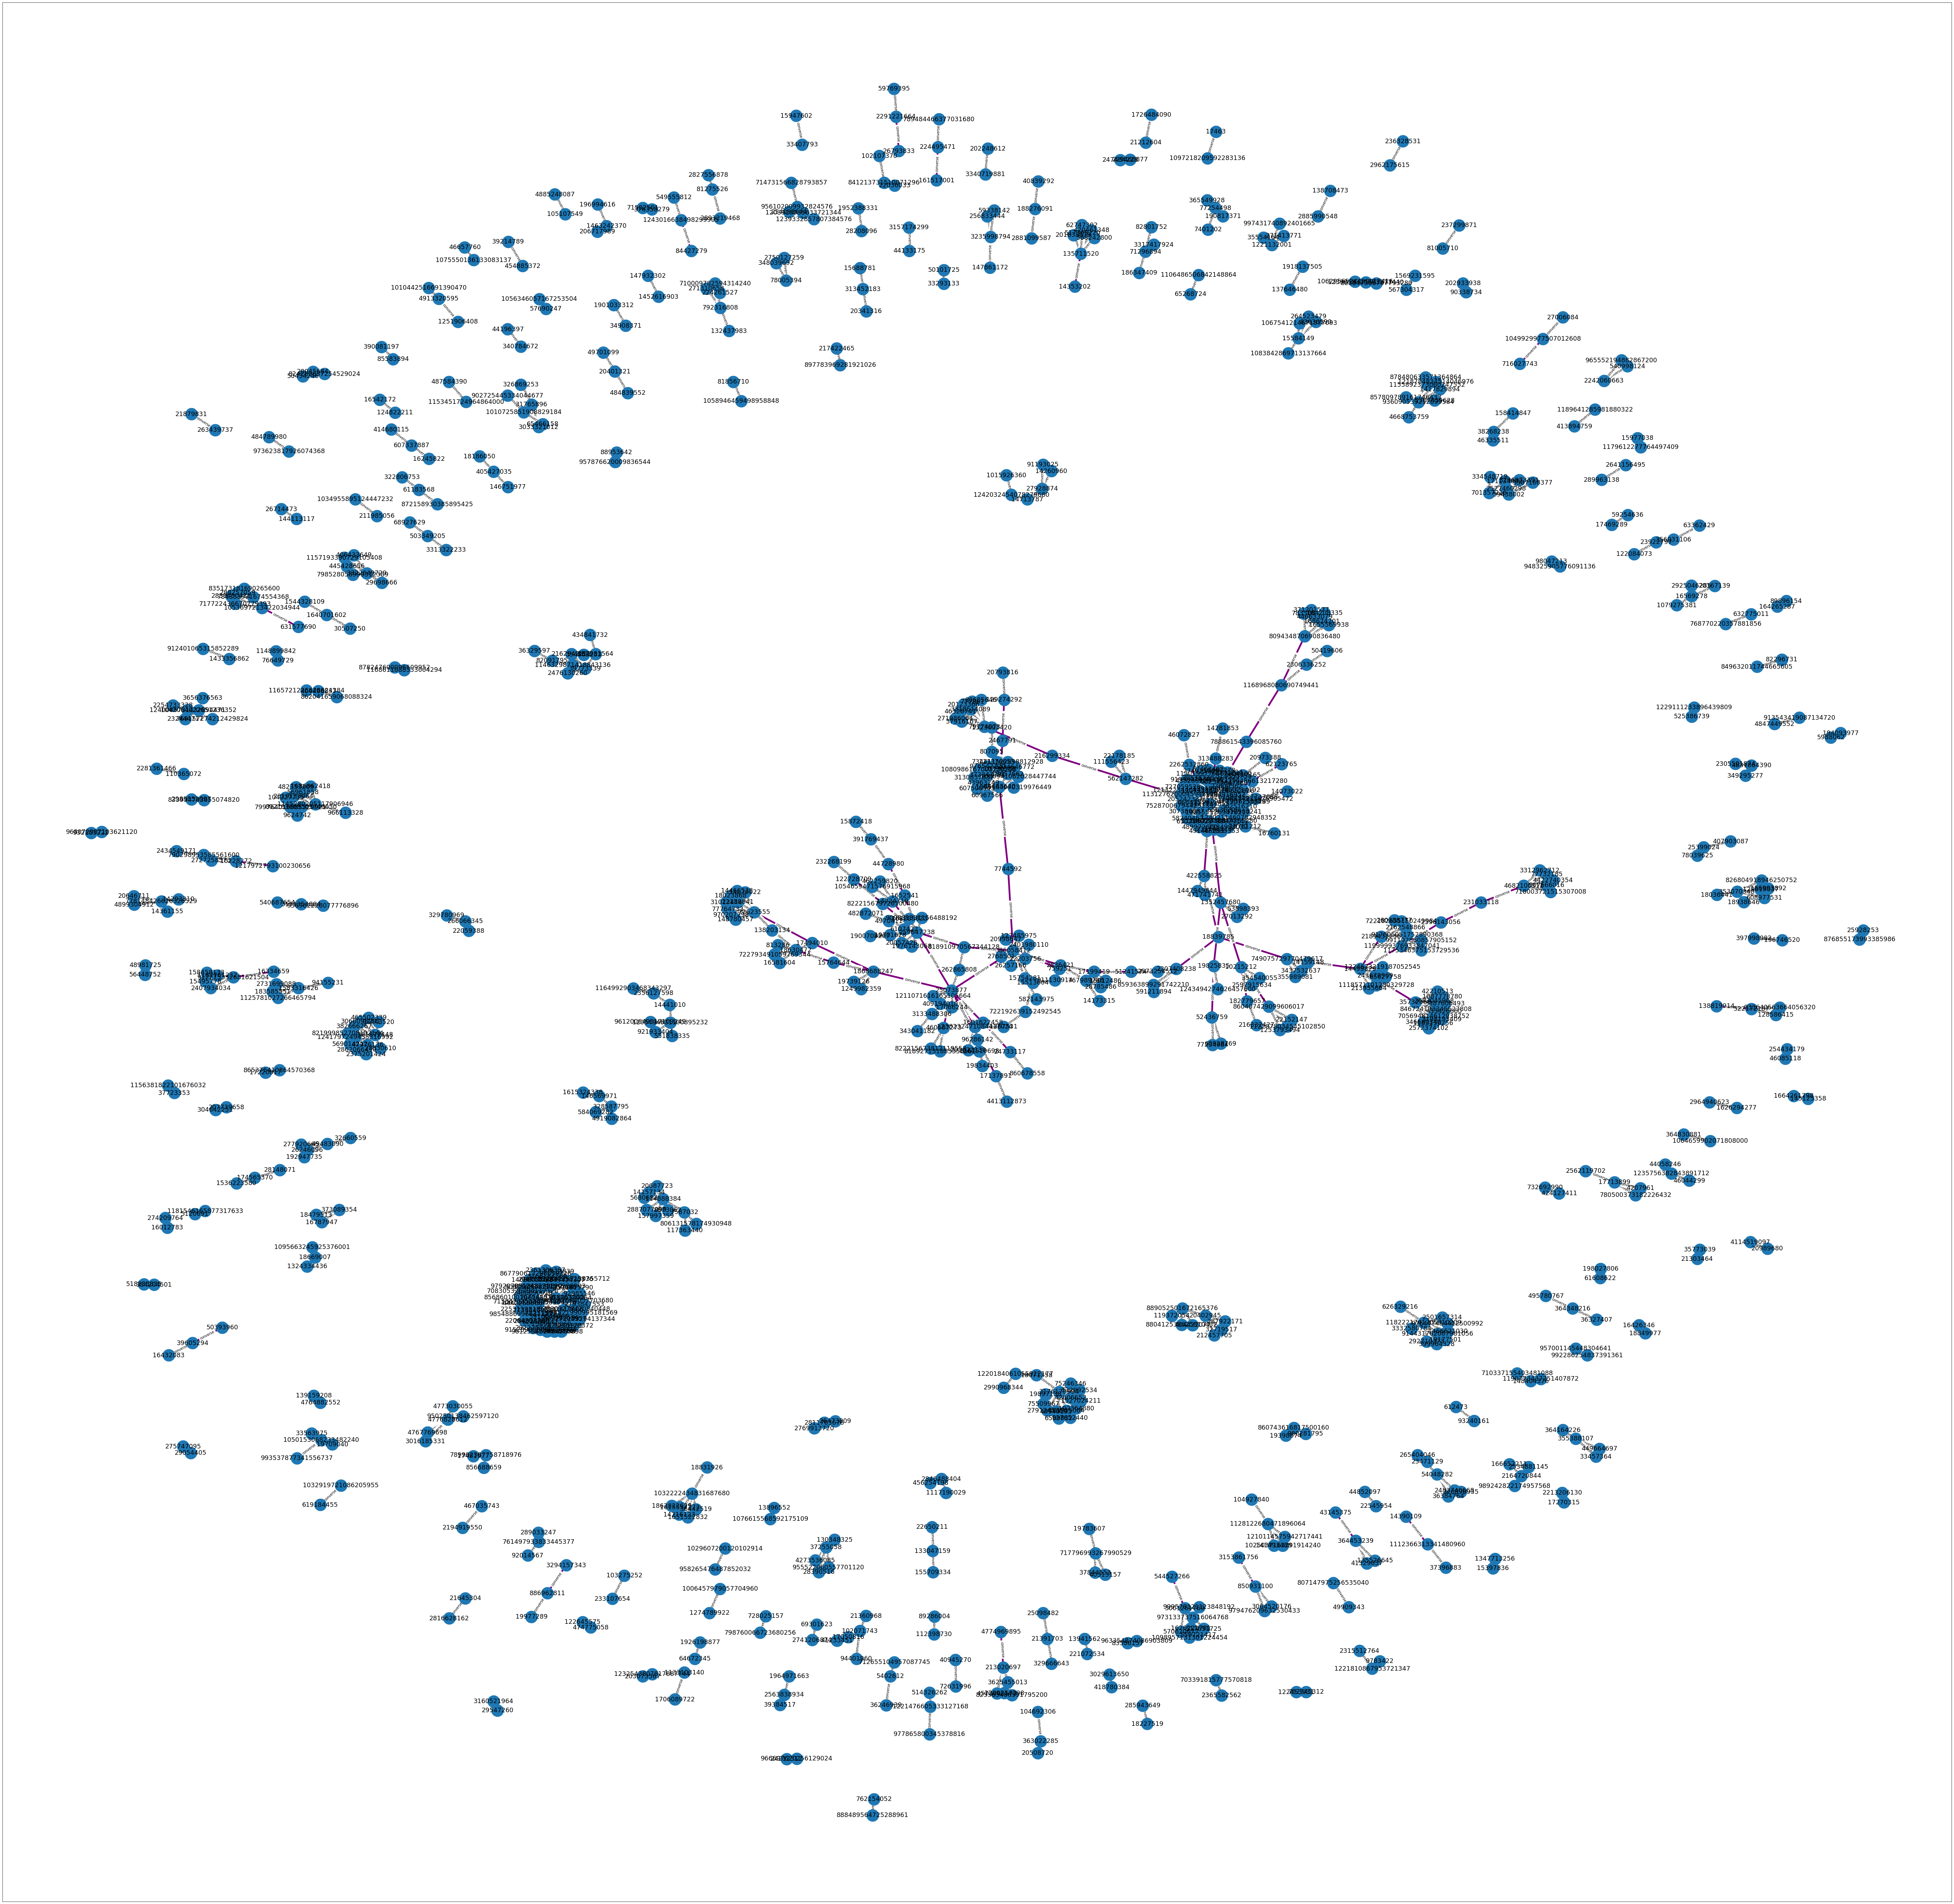

In [7]:
plt.figure(3,figsize=(100,100))

# Draw nodes
nx.draw_networkx_nodes(g,pos,node_size=1200)
 
# Draw edges
nx.draw_networkx_edges(g, pos, edgelist=edge_follow, width=5, edge_color='green')
nx.draw_networkx_edges(g, pos, edgelist=edge_converse, width=5, edge_color='purple')
nx.draw_networkx_edges(g, pos, edgelist=edge_retweet, width=5, edge_color='red')
 
# Draw node labels
nx.draw_networkx_labels(g,pos,font_size=18,font_family='sans-serif')
# Draw edge labels

edge_labels =dict([((u, v), d['label']) 
                   for u, v, d in g.edges(data=True)])
 
nx.draw_networkx_edge_labels(g, pos, edge_labels=edge_labels)

plt.show() # display